# Practice Sheet
From: __Introduction to Python for Engineers and Scientist__ by Sandeep Nagar (APRESS)

## (7.12) Subplots

In [1]:
import matplotlib.pyplot as plt
import numpy as np

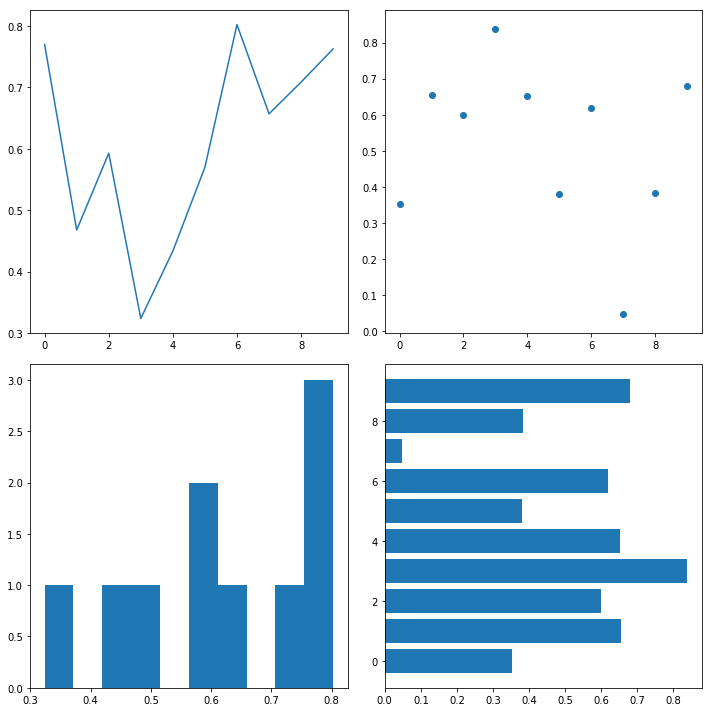

In [2]:
# Listing 7.15

x = np.arange(10)
y1 = np.random.rand(10)
y2 = np.random.rand(10)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax1.plot(x,y1)
ax2.scatter(x, y2)
ax3.hist(y1)
ax4.barh(x, y2)
plt.tight_layout()

## (7.13) Saving a Plot to a File

In [3]:
# Listing 7.16

fig.savefig('plot1.png')

Gambar dibuka:
![Gambar hasilnya](./plot1.png)

## (7.17) Two Plots on the Same Figure with at least One Axis Different

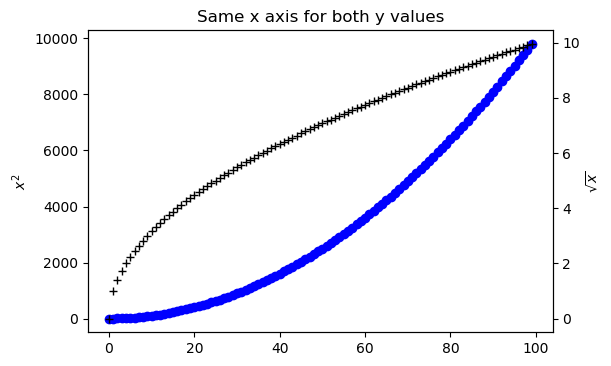

In [8]:
# Listing 7-19

x = np.arange(0., 100, 1)
y1 = x**2
y2 = np.sqrt(x)

fig, ax1 = plt.subplots(dpi=100)
ax1.plot(x, y1, 'bo')
ax1.set_ylabel('$x^{2}$')
ax2 = ax1.twinx()
ax2.plot(x, y2, 'k+')
ax2.set_ylabel('$\sqrt{x}$')
ax2.set_title('Same x axis for both y values')
plt.show()

## (7.18) Contour Plots

(101,) (101,) (101, 101)


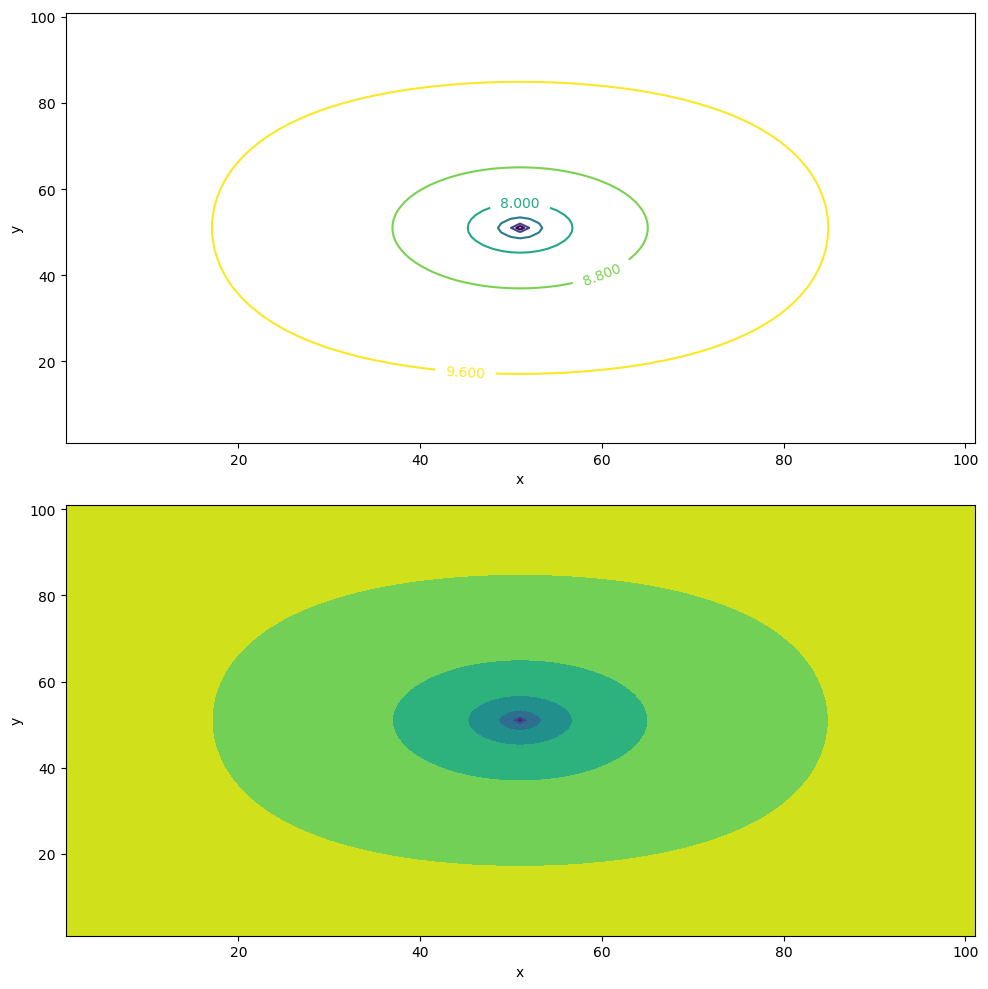

In [64]:
a = np.loadtxt('./plottest_3d.TXT')
x = a[:,0].copy()
y = a[:,1].copy()
z = a[:,2].copy()

x = np.unique(x)
y = np.unique(y)
z = z.reshape(len(x),len(y))

print(x.shape, y.shape, z.shape)

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10,10), dpi=100)
c1 = ax1.contour(x, y, z)
l1 = ax1.clabel(c1)
lx1 = ax1.set_xlabel('x')
ly1 = ax1.set_ylabel('y')

c2 = ax2.contourf(x, y, z)
# l2 = ax2.clabel(c2)
lx2 = ax2.set_xlabel('x')
ly2 = ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

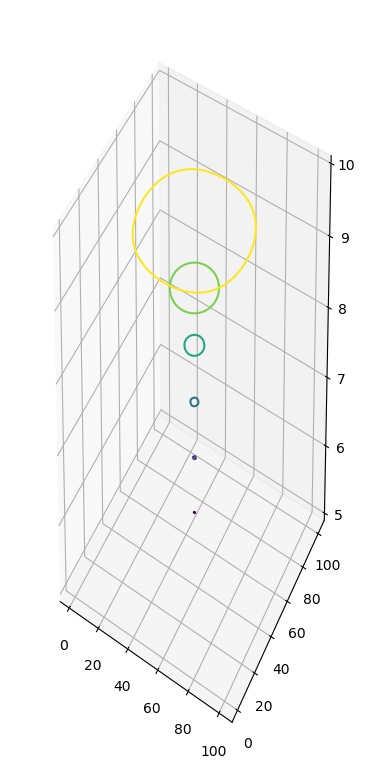

In [58]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure(figsize=(10,10), dpi=100)
ax1 = fig.add_subplot(121, projection='3d')
cont = ax1.contour(x, y, z)

(100,) (100,)
(100, 100) (100, 100) (100, 100)


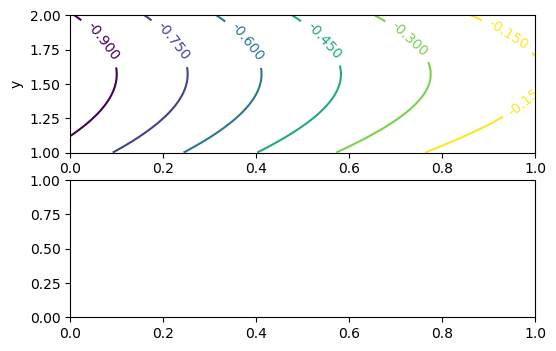

In [34]:

tx = np.linspace(0, 1, 100)
ty = np.linspace(1,2, 100)
print(tx.shape, ty.shape)
(tX, tY) = np.meshgrid(tx, ty)
tz = np.sin(tX) - np.sin(tY)
print(tX.shape, tY.shape, tz.shape)

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, dpi=100)

c1 = ax1.contour(tx, ty, tz)
l1 = ax1.clabel(c1)
lx1 = ax1.set_xlabel('x')
ly1 = ax1.set_ylabel('y')

plt.show();

array([  1.,   1.,   1., ..., 101., 101., 101.])

In [87]:
import plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=True)

a = np.loadtxt('./plottest_3d.TXT')
x = a[:,0].copy()
y = a[:,1].copy()
z = a[:,2].copy()

num = 101
xGrid = x.reshape(num,num).T
yGrid = y.reshape(num,num).T
z = z.reshape(num,num)


# x = np.unique(x)
# y = np.unique(y)
# z = z.reshape(len(x),len(y))
lines = []
line_marker = dict(color='#0066FF', width=2)
for i, j, k in zip(xGrid, yGrid, z):
    lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

# Creating the data
# x = np.linspace(-5, 5, 50)
# y = np.linspace(-5, 5, 50)
# xGrid, yGrid = np.meshgrid(y, x)
# R = np.sqrt(xGrid ** 2 + yGrid ** 2)
# z = np.sin(R)

# print(x.shape, y.shape)
# print(xGrid.shape, yGrid.shape)
# print(z.shape)

# # Creating the plot
# lines = []
# line_marker = dict(color='#0066FF', width=2)
# for i, j, k in zip(xGrid, yGrid, z):
#     lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

layout = go.Layout(
    title='Wireframe Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    ),
    showlegend=False,
)
fig = go.Figure(data=lines, layout=layout)
iplot(fig, filename='wireframe_plot')